# **FICO Analytic Challenge © Fair Isaac 2024**

# Week 5 - Logistic Regression - Model training and evaluation

## Logistic Regression

Logistic regression is a Machine Learning algorithm used primarily for binary classification problems, where the outcome can take one of two possible values. The goal is to predict the probability that the outcome belongs to a given class or not based on information from predictor variables.

Few examples of binary classification problems -
1. Spam Detection: To predict if an email is spam or not spam
2. Medical Diagnosis: To predict if a tumor is malignant or not
3. Marketing: To predict if a customer will buy a product or not
4. **Credit Scoring**: To predict if a customer will default on a loan or not
5. **Fraud Detection**: To identify if a transaction is fraud or not



<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-11-51-17.png width = "800" style="margin:50px 0px 50px 0px">

<img src = https://www.saedsayad.com/images/LogReg_1.png width = "1000" style="margin:50px 0px 50px 0px">

**Sigmoid function:** The S-shaped curve used to predict probabilities. It's value is always between 0 and 1. <br>
<img src = https://editor.analyticsvidhya.com/uploads/642295.png style="margin:0px 50px 20px 250px">

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-10-58-02.png width = "800" style="margin:50px 0px 50px 0px">

**Resources:**

https://www.kdnuggets.com/2020/03/linear-logistic-regression-explained.html

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

## Contents

**1. Load Dataset**

**2. Modelling Data Preparation**

    2.1 Summary Statistics
    2.2 Missing value analysis
    2.3 Normalization of the features
    2.4 Dataset filtering
    2.5 Create train and test datasets
    
**3. Model Training**

    3.1 Training Logistic Regression Model
    3.2 Forward Selection of features
    3.3 Backward Elimination of features

## 1. Load Dataset

1. Load the train and test datasets
2. Create a new column 'is_train' to use it as a tag to identify train and test datasets
3. Combine the train and test datasets for further analysis

In [1]:
! pip install mlxtend

In [2]:
! pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump, load

pd.set_option('display.max_columns', None)   # displays all columns
pd.set_option('display.max_rows', None)    # displays all rows

In [4]:
# Setting up the Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

import os
import sys

path = '/content/drive/MyDrive/FICO Analytic Challenge/'
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/FICO Analytic Challenge


In [5]:
# Location of the data
data = 'Data'

# Location to save model
model_folder = 'Model'

# Names of the datasets
train_dataset_name = "train_features.csv"
test_dataset_name = "test_A_features.csv"

# Name of the model
model = 'LogReg'

In [6]:
# Read the train dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows

df_train_features = pd.read_csv(os.path.join(path, data, train_dataset_name))
print(df_train_features.shape)
df_train_features.head()

(989717, 43)


datetime                pan                    merchant  \
0  2020-01-01 17:12:25  0033864050176488B  Stehr, Jewess and Schimmel   
1  2020-01-01 17:47:30  0033864050176488B            Fritsch and Sons   
2  2020-01-01 17:59:01  0033864050176488B   Tromp, Kerluke and Glover   
3  2020-01-01 18:05:38  0033864050176488B                Homenick LLC   
4  2020-01-01 18:08:36  0033864050176488B                Mayert Group   

         category  transactionAmount      lat     long  \
0        misc_net              35.83  41.1826 -92.3097   
1  health_fitness               1.89  41.1826 -92.3097   
2     grocery_net              18.53  41.1826 -92.3097   
3   personal_care              90.24  41.1826 -92.3097   
4    shopping_pos             156.86  41.1826 -92.3097   

                          trans_num   unix_time  merch_lat  merch_long  \
0  362febb0060ce2d6a995a72a116e34f4  1350565945  40.289849  -92.676330   
1  de7d5f0356d41470cd02e719e2e0b196  1350568050  40.699982  -91.713680   
2  c9d194a3266cd20b23478dd8d2361ef9  1350529141  40.295853  -92.779702   
3  e860a23fcbb2d46956a6f4f7b18cfe3f  1353168338  40.535509  -91.770945   
4  d3db2da4a5c741058ff57f61023e5353  1353168516  41.245006  -92.860950   

   mdlIsFraudTrx  mdlIsFraudAcct  transactionDateTime  is_train merchCountry  \
0              0               0  2020-01-01 17:12:25         1           US   
1              0               0  2020-01-01 17:47:30         1           US   
2              0               0  2020-01-01 17:59:01         1           US   
3              0               0  2020-01-01 18:05:38         1           US   
4              0               0  2020-01-01 18:08:36         1           US   

  merchState cardholderCountry cardholderState  transactionHour  \
0   Missouri                US            Iowa               17   
1       Iowa                US            Iowa               17   
2   Missouri                US            Iowa               17   
3   Missouri                US            Iowa               18   
4       Iowa                US            Iowa               18   

   time_since_last_transaction  IsHighValue  is_international  is_cnp  \
0                     0.000000            0                 0       1   
1                     0.584722            0                 0       0   
2                     0.191944            0                 0       1   
3                     0.110278            0                 0       0   
4                     0.049444            1                 0       0   

   is_shoppingnet  is_grocery_net  is_travel  IS_0_TO_5AM  average_spending  \
0               0               0      False            0         66.400815   
1               0               0      False            0         66.400815   
2               0               1      False            0         66.400815   
3               0               0      False            0         66.400815   
4               0               0      False            0         66.400815   

   wednesday_buy  monday_buy  spending_below_avg_20  spending_above_threshold  \
0            0.0         0.0                      1                         0   
1            0.0         0.0                      1                         0   
2            0.0         0.0                      1                         0   
3            0.0         0.0                      0                         1   
4            0.0         0.0                      0                         1   

   outside_state_purchase  is_late_night  user_avg_amount  RelativeAmount  \
0                       1              0           0.0000        0.000000   
1                       0              0          35.8300        0.052749   
2                       1              0          18.8600        0.982503   
3                       1              0          18.7500        4.812800   
4                       0              0          36.6225        4.283159   

   deltaTime  amt_trend_5e  amt_t

In [7]:
# Read the test dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows

df_test_features = pd.read_csv(os.path.join(path, data, test_dataset_name))
print(df_test_features.shape)
df_test_features.head()

(621763, 43)


datetime                pan         merchant      category  \
0  2020-01-01 17:57:01  0150904986626304B       Skiles LLC          home   
1  2020-01-01 17:58:19  0150904986626304B      Gutmann Ltd   grocery_net   
2  2020-01-01 18:29:29  0150904986626304B        Terry Ltd          home   
3  2020-01-01 18:32:09  0150904986626304B    Berge-Ullrich          home   
4  2020-01-01 18:39:39  0150904986626304B  Jacobi and Sons  shopping_pos   

   transactionAmount      lat     long                         trans_num  \
0              36.50  42.8035 -88.4092  db6a0a1b9e86c282da6a4bc57104f1a1   
1              76.51  42.8035 -88.4092  2e893c8e5e97f1831b9900bb2a9e5245   
2              45.53  42.8035 -88.4092  1491abd68110bccb8c9c532f3ad551ab   
3              23.53  42.8035 -88.4092  2e7db00db2f28d0e4d868ca93c450b2d   
4               9.39  42.8035 -88.4092  da0d0da0d263277ea33f9c1038e97628   

    unix_time  merch_lat  merch_long  mdlIsFraudTrx  mdlIsFraudAcct  \
0  1382133421  41.953278  -89.323863              0               0   
1  1382072299  41.818884  -87.525811              0               0   
2  1384694969  43.692286  -87.538847              0               0   
3  1384702329  42.799134  -88.388955              0               0   
4  1383399579  43.030063  -88.774836              0               0   

   transactionDateTime  is_train merchCountry merchState cardholderCountry  \
0  2020-01-01 17:57:01         0           US   Illinois                US   
1  2020-01-01 17:58:19         0           US   Illinois                US   
2  2020-01-01 18:29:29         0           US  Wisconsin                US   
3  2020-01-01 18:32:09         0           US  Wisconsin                US   
4  2020-01-01 18:39:39         0           US  Wisconsin                US   

  cardholderState  transactionHour  time_since_last_transaction  IsHighValue  \
0       Wisconsin               17                     0.000000            0   
1       Wisconsin               17                     0.021667            0   
2       Wisconsin               18                     0.519444            0   
3       Wisconsin               18                     0.044444            0   
4       Wisconsin               18                     0.125000            0   

   is_international  is_cnp  is_shoppingnet  is_grocery_net  is_travel  \
0                 0       0               0               0      False   
1                 0       1               0               1      False   
2                 0       0               0               0      False   
3                 0       0               0               0      False   
4                 0       0               0               0      False   

   IS_0_TO_5AM  average_spending  wednesday_buy  monday_buy  \
0            0         57.197781            0.0         0.0   
1            0         57.197781            0.0         0.0   
2            0         57.197781            0.0         1.0   
3            0         57.197781            0.0         0.0   
4            0         57.197781            0.0         0.0   

   spending_below_avg_20  spending_above_threshold  outside_state_purchase  \
0                      1                         0                       1   
1                      0                         1                       1   
2                      0                         0                       0   
3                      1                         0                       0   
4                      1                         0                       0   

   is_late_night  user_avg_amount  RelativeAmount  deltaTime  amt_trend_5e  \
0              0       524.050000        0.069650        0.0         0.000   
1              0        36.500000        2.096164       78.0         0.000   
2              0        56.505000        0.805769     1870.0         0.000   
3              0        52.846667        0.445250      160.0         0.000   
4              0        45.517500       

In [8]:
# Combine train and test datasets for feature analysis and further processing
df = pd.concat([df_train_features, df_test_features], ignore_index=True, axis=0)
df.shape

(1611480, 43)

In [9]:
# Drop the columns which are not needed for modelling
def modify_df(df1):
    # UPDATE THIS PART, ONLY WITH COLUMNS THAT ARE NOT NEEDED
    df1.drop(columns=['transactionDateTime',
                      'trans_num',
                      'unix_time',
                      'merchCountry',
                      'merchState',
                      'merch_lat',
                      'merch_long',
                      'deltaTime',
                      'lat',
                      'long'
                     ],
             inplace= True)

    df1['datetime'] = pd.to_datetime(df1['datetime']).astype('datetime64[ns]')
    df1.rename(columns = {'datetime':'transactionDateTime'}, inplace = True)

    return df1

df = modify_df(df)
df.shape

(1611480, 33)

#### Analyze transaction level fraud rates

In [10]:
# Analyze distribution of mdlIsFraudTrx
print(df['mdlIsFraudTrx'].value_counts(dropna = False))

# Analyze distribution of mdlIsFraudTrx as percentage - Fraud rate
print(df['mdlIsFraudTrx'].value_counts(dropna = False, normalize = True))

mdlIsFraudTrx
0    1601981
1       9499
Name: count, dtype: int64
mdlIsFraudTrx
0    0.994105
1    0.005895
Name: proportion, dtype: float64


#### Analyze account level fraud rates

In [63]:
# Number of unique pan ids
print(df['pan'].nunique())

# Create account level dataset by retaining unique pan ids
df_account = df[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print(df_account.shape)

1532
(1532, 2)


In [64]:
# Analyze distribution of mdlIsFraudAcct
print(df_account['mdlIsFraudAcct'].value_counts(dropna = False))

# Analyze distribution of mdlIsFraudAcct as percentage - Fraud rate
print(df_account['mdlIsFraudAcct'].value_counts(dropna = False, normalize = True))

mdlIsFraudAcct
1    877
0    655
Name: count, dtype: int64
mdlIsFraudAcct
1   0.572454
0   0.427546
Name: proportion, dtype: float64


#### Create Card Present/Card Not Present flag

In [65]:
# Create flag is_CNP which takes values 1 for card not present and 0 for card present
df['is_CNP'] = (df['category'].apply(lambda x: x[-3:] == 'net')).astype(int)
df['is_CNP'].value_counts(dropna = False)

is_CNP
0    1352443
1     259037
Name: count, dtype: int64

In [66]:
# Fraud rates for CP vs CNP
print(pd.crosstab(df['is_CNP'],df['mdlIsFraudTrx']))
print(pd.crosstab(df['is_CNP'],df['mdlIsFraudTrx'], normalize = 'index'))

mdlIsFraudTrx        0     1
is_CNP                      
0              1346347  6096
1               255634  3403
mdlIsFraudTrx        0        1
is_CNP                         
0             0.995493 0.004507
1             0.986863 0.013137


#### Create Features dataset and Target data

**Features** - Features are also known as predictors, independent variables, or input variables. These are the attributes of the data that are used to make predictions. They are the inputs to the model. Features are derived from information available at the time of prediction. Features are generally represented by X.

**Target** - Target is also known as the response, dependent variable, or output variable. It is the value or label that the model is trying to predict. It is the output of the model. Target is generally represented by y.

In [67]:
# Columns that are in the dataframe that aren't inputs to the model, aside from the the columns dropped when importing the dataset
base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry',
       'cardholderState', 'transactionDateTime']

feature_columns = list(set(df.columns) - set(base_cols+['is_CNP']))
feature_columns.sort()

print('Number of features : ',len(feature_columns))
print('features : ',feature_columns)

# Assign all predictor variables (features) to X and target variable to y
X = df[feature_columns].copy()
print(X.shape)
y = df['mdlIsFraudTrx']

Number of features :  23
features :  ['IS_0_TO_5AM', 'IsHighValue', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'is_cnp', 'is_grocery_net', 'is_international', 'is_late_night', 'is_shoppingnet', 'is_travel', 'monday_buy', 'outside_state_purchase', 'repeat_amt', 'spending_above_threshold', 'spending_below_avg_20', 'time_since_last_transaction', 'transactionHour', 'user_avg_amount', 'wednesday_buy']
(1611480, 23)


In [68]:
# Analyze distribution of target variable
y.value_counts(dropna = False)

mdlIsFraudTrx
0    1601981
1       9499
Name: count, dtype: int64

In [69]:
# Analyze distribution of target variable as percentage - Fraud rate
y.value_counts(dropna = False, normalize = True)

mdlIsFraudTrx
0   0.994105
1   0.005895
Name: proportion, dtype: float64

## 2. Modelling data preparation

### 2.1 Summary Statistics

Analyze the univariate statistics like min, max, median, percentile distribution etc for all the predictive features

In [70]:
print("Summary Statistics")
summary_statistics = X.describe().T
summary_statistics

Summary Statistics


count      mean        std      min  \
IS_0_TO_5AM                 1611480.000000  0.126502   0.332414 0.000000   
IsHighValue                 1611480.000000  0.198296   0.398716 0.000000   
RelativeAmount              1611480.000000  1.022959   2.601448 0.000000   
amt_trend_24h               1611480.000000 84.630676 158.454044 1.000000   
amt_trend_5e                1611480.000000 84.522173 144.691079 0.000000   
average_spending            1611480.000000 84.957271  84.472965 1.910000   
category_ratio              1611480.000000  0.000000   0.000000 0.000000   
count_trend_1h              1611480.000000  2.463657   2.471105 1.000000   
is_cnp                      1611480.000000  0.160745   0.367295 0.000000   
is_grocery_net              1611480.000000  0.035763   0.185698 0.000000   
is_international            1611480.000000  0.052110   0.222250 0.000000   
is_late_night               1611480.000000  0.175867   0.380707 0.000000   
is_shoppingnet              1611480.000000  0.075583   0.264329 0.000000   
monday_buy                  1611480.000000  0.109833   0.312682 0.000000   
outside_state_purchase      1611480.000000  0.261445   0.439422 0.000000   
repeat_amt                  1611480.000000  0.000639   0.025274 0.000000   
spending_above_threshold    1611480.000000  0.244053   0.429524 0.000000   
spending_below_avg_20       1611480.000000  0.534911   0.498780 0.000000   
time_since_last_transaction 1611480.000000  7.755158  13.371004 0.000000   
transactionHour             1611480.000000 12.909921   6.213373 0.000000   
user_avg_amount             1611480.000000 85.084911  84.706410 0.000000   
wednesday_buy               1611480.000000  0.076415   0.265661 0.000000   

                                  25%       50%       75%          max  
IS_0_TO_5AM                  0.000000  0.000000  0.000000     1.000000  
IsHighValue                  0.000000  0.000000  0.000000     1.000000  
RelativeAmount               0.156774  0.661216  1.217592   676.388128  
amt_trend_24h               37.780000 57.290000 83.824628 35738.610000  
amt_trend_5e                37.942000 57.056000 83.068000 25755.742000  
average_spending            58.704462 65.193669 85.553277  2570.850000  
category_ratio               0.000000  0.000000  0.000000     0.000000  
count_trend_1h               1.000000  1.000000  3.000000    45.000000  
is_cnp                       0.000000  0.000000  0.000000     1.000000  
is_grocery_net               0.000000  0.000000  0.000000     1.000000  
is_international             0.000000  0.000000  0.000000     1.000000  
is_late_night                0.000000  0.000000  0.000000     1.000000  
is_shoppingnet               0.000000  0.000000  0.000000     1.000000  
monday_buy                   0.000000  0.000000  0.000000     1.000000  
outside_state_purchase       0.000000  0.000000  1.000000     1.000000  
repeat_amt                   0.000000  0.000000  0.000000     1.000000  
spending_above_threshold     0.000000  0.000000  0.000000     1.000000  
spending_below_avg_20        0.000000  1.000000  1.000000     1.000000  
time_since_last_transaction  0.161667  1.281389 10.358333   372.630833  
transactionHour              9.000000 14.000000 18.000000    23.000000  
user_avg_amount             57.420526 65.530235 85.936107  2621.632222  
wednesday_buy                0.000000  0.000000  0.000000     1.000000

### 2.2 Missing value analysis

There are various methods to handle missing data. For example,
- If the proportion of missing values in a column is beyond a tolerable limit, those columns can be excluded from the model
- If the missing values of a column are within tolerable limit, they are imputed with median or mean value of the column

**isna()** is used to identify missing values in the dataset. It returns boolean values - 'True' indicates missing value, 'Flase' indicates non-missing values<br>
**fillna()** is used to replace missing/null values with a specified value

In [71]:
# Calculate the proportion of missing values in each column
X.isna().mean()

IS_0_TO_5AM                   0.000000
IsHighValue                   0.000000
RelativeAmount                0.000000
amt_trend_24h                 0.000000
amt_trend_5e                  0.000000
average_spending              0.000000
category_ratio                0.000000
count_trend_1h                0.000000
is_cnp                        0.000000
is_grocery_net                0.000000
is_international              0.000000
is_late_night                 0.000000
is_shoppingnet                0.000000
is_travel                     0.000000
monday_buy                    0.000000
outside_state_purchase        0.000000
repeat_amt                    0.000000
spending_above_threshold      0.000000
spending_below_avg_20         0.000000
time_since_last_transaction   0.000000
transactionHour               0.000000
user_avg_amount               0.000000
wednesday_buy                 0.000000
dtype: float64

In [72]:
# Remove columns with high missing values beyond a threshold
# Threshold value can be changed
threshold_missing = 0.2

X = X.loc[:, X.isna().mean() < threshold_missing]
X.shape

(1611480, 23)

In [73]:
## Impute missings with median value for variables below missing threshold
print(X.median())
X = X.fillna(X.median())

IS_0_TO_5AM                    0.000000
IsHighValue                    0.000000
RelativeAmount                 0.661216
amt_trend_24h                 57.290000
amt_trend_5e                  57.056000
average_spending              65.193669
category_ratio                 0.000000
count_trend_1h                 1.000000
is_cnp                         0.000000
is_grocery_net                 0.000000
is_international               0.000000
is_late_night                  0.000000
is_shoppingnet                 0.000000
is_travel                      0.000000
monday_buy                     0.000000
outside_state_purchase         0.000000
repeat_amt                     0.000000
spending_above_threshold       0.000000
spending_below_avg_20          1.000000
time_since_last_transaction    1.281389
transactionHour               14.000000
user_avg_amount               65.530235
wednesday_buy                  0.000000
dtype: float64


### 2.3 Normalization of the features

Normalization is done to transform the freatures to a same scale. This helps in stable model training and easy interpretability of feature importance.

There are different ways to normalize data. More details on why normalization is required and different ways to normalize the data can be found here -
https://www.datacamp.com/tutorial/normalization-in-machine-learning

**StandardScaler** function from sklean is used to normalize the features. It uses below formula to normalize the features.

x_transform = (x-mean)/standard deviation

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transform = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X_transform.shape)
X_transform.head()

(1611480, 23)


IS_0_TO_5AM  IsHighValue  RelativeAmount  amt_trend_24h  amt_trend_5e  \
0    -0.380555    -0.497336       -0.393227      -0.307980     -0.584156   
1    -0.380555    -0.497336       -0.372950      -0.415077     -0.584156   
2    -0.380555    -0.497336       -0.015552      -0.415772     -0.584156   
3    -0.380555    -0.497336        1.456820      -0.302979     -0.584156   
4    -0.380555     2.010713        1.253225      -0.151215     -0.164849   

   average_spending  category_ratio  count_trend_1h    is_cnp  is_grocery_net  \
0         -0.219673        0.000000       -0.592309  2.284960       -0.192586   
1         -0.219673        0.000000       -0.187632 -0.437644       -0.192586   
2         -0.219673        0.000000        0.217046  2.284960        5.192498   
3         -0.219673        0.000000        0.621723 -0.437644       -0.192586   
4         -0.219673        0.000000        1.026401 -0.437644       -0.192586   

   is_international  is_late_night  is_shoppingnet  is_travel  monday_buy  \
0         -0.234468      -0.461948       -0.285941  -0.060319   -0.351262   
1         -0.234468      -0.461948       -0.285941  -0.060319   -0.351262   
2         -0.234468      -0.461948       -0.285941  -0.060319   -0.351262   
3         -0.234468      -0.461948       -0.285941  -0.060319   -0.351262   
4         -0.234468      -0.461948       -0.285941  -0.060319   -0.351262   

   outside_state_purchase  repeat_amt  spending_above_threshold  \
0                1.680741   -0.025290                 -0.568193   
1               -0.594976   -0.025290                 -0.568193   
2                1.680741   -0.025290                 -0.568193   
3                1.680741   -0.025290                  1.759965   
4               -0.594976   -0.025290                  1.759965   

   spending_below_avg_20  time_since_last_transaction  transactionHour  \
0               0.932454                    -0.579998         0.658271   
1               0.932454                    -0.536268         0.658271   
2               0.932454                    -0.565643         0.658271   
3              -1.072439                    -0.571751         0.819214   
4              -1.072439                    -0.576300         0.819214   

   user_avg_amount  wednesday_buy  
0        -1.004469      -0.287641  
1        -0.581478      -0.287641  
2        -0.781817      -0.287641  
3        -0.783116      -0.287641  
4        -0.572122      -0.287641

In [75]:
# Save the scaling parameters
scaleFile = os.path.join(path, data , 'scaler.' + model + '.' + data + ".pkl")
dump(scaler, open(scaleFile, 'wb'))

### 2.4 Dataset filtering

The following transactions needs to be excluded from modelling data.
 - Transactions which are in the first two months to allow for profile maturation
 - All the non-fraud transactions corresponding to a fraud account are excluded from the model training

#### Removing first two months transactions to allow for profile maturation
Since some of our profile variables depend on potentially long periods of time, we would like to allow those features to fully build up to their entire calculation window. Ideally, we would have several months before the training period to allow for these features to mature, but since we only have a year's worth of data, we will restrict ourselves to a maximum of 2 month window, allowing our data to train on the remaining 10 months of data. These initial 2 months are known as the ‘profile maturation period’, where these profile variables properly develop. We exclude the transactions from the first 2 months from the modelling data to allow for profile maturation.

<font color='red'>**Do not modify the function**</font>

In [76]:
# Function to create boolean variable which tags transactions in the first two months as 'False' and transactions after two months as 'True'
def matureProf_n_months(df1, datetime_col, n_months=2):
    # Find earliest date in dataset
    min_date = df1[datetime_col].min()
    # Calculate cutoff date by adding n_months to min_date
    cutoff_date = min_date + pd.DateOffset(months=n_months)
    print('Earliest date: ', min_date)
    print('Cutoff date: ', cutoff_date)

    # return a boolean column which takes 'True' for rows where the datetime is less than the cutoff time, otherwise 'False'
    return df1[datetime_col] >= cutoff_date

# Create boolean variable which tags transactions in the first two months as 'False' and transactions after two months as 'True'
profileMature_bool = matureProf_n_months(df, 'transactionDateTime', n_months=2)

Earliest date:  2020-01-01 00:00:02
Cutoff date:  2020-03-01 00:00:02


In [77]:
# Remove the transactions from first two months using profileMature_bool
X_profileMature = X_transform[profileMature_bool]
y_profileMature = y[profileMature_bool]

df_profileMature = df[profileMature_bool]

In [78]:
print(X_profileMature.shape)
print(y_profileMature.shape)
print(df_profileMature.shape)

(1431045, 23)
(1431045,)
(1431045, 34)


#### Removing Non-fraud transactions from Fraud accounts
A fraud account can have fraud transactions and non-fraud transactions. To avoid any uncertainty of these non-fraud transactions being fraud or not, we remove all non-fraud transactions of a fraud account from modelling data.

In [79]:
# Generate cross-frequency of mdlIsFraudAcct and mdlIsFraudTrx
pd.crosstab(df_profileMature['mdlIsFraudAcct'], df_profileMature['mdlIsFraudTrx'])

mdlIsFraudTrx        0     1
mdlIsFraudAcct              
0               701729     0
1               720945  8371

In [80]:
# Create a boolean variable which tags non-fraud transactions of a fraud account as 'False' and the rest of the transactions as 'True'
filter_bool = ~((df_profileMature['mdlIsFraudAcct']==1) & (df_profileMature['mdlIsFraudTrx']==0))
filter_bool.value_counts(dropna = False)

False    720945
True     710100
Name: count, dtype: int64

In [81]:
# Use the filter_bool variable to filter the features and target datasets
X_filtered = X_profileMature[filter_bool]
y_filtered = y_profileMature[filter_bool]

print(X_filtered.shape)
print(y_filtered.shape)

(710100, 23)
(710100,)


In [82]:
# Filtering the main dataset
df_filtered = df_profileMature.loc[filter_bool, :]
df_filtered.shape

(710100, 34)

In [83]:
# Unique pan ids
df_filtered['pan'].nunique()

1422

### 2.5 Create train and test datasets

Train dataset is used to **train the model** and test dataset is used to **evaluate the model** performance. The train and test datasets are chosen randomly so that both datasets represents the  distributions in overall data. Having a test data independent of the train data to evaluate the model also reduces risk of over-fitting of the model.

https://www.geeksforgeeks.org/training-data-vs-testing-data/

For the purpose of fraud modelling, we need to make sure that all the transactions corresponding to an account (pan id) are part of either train data or test data. Otherwise, there will be profile leaks if transactions from same account are included in both train and test datasets. In that case test data cannot be considered as independent of train data for the sake of evaluation

**GroupShuffleSplit** function from sklearn is used to create train and test datasets while ensuring that the accounts from same group (pan) fall into either train or test data

In [84]:
# from sklearn.model_selection import GroupShuffleSplit

# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=100)

# for train_idx, test_idx in gss.split(X_filtered, y_filtered, groups=df_filtered['pan']):
#     # splitting features dataset and target dataset into train and test
#     X_train, X_test = X_filtered.iloc[train_idx], X_filtered.iloc[test_idx]
#     y_train, y_test = y_filtered.iloc[train_idx], y_filtered.iloc[test_idx]

#     # splitting the filtered dataset
#     df_train, df_test = df_filtered.iloc[train_idx], df_filtered.iloc[test_idx]

In [85]:
# Use is_train field to split the data into train and test samples

# Create boolean variables for train and test
train_bool = (df_filtered['is_train']==1)
test_bool = (df_filtered['is_train']==0)

# Use the boolean variable to create train data
X_train = X_filtered.loc[train_bool]
y_train = y_filtered.loc[train_bool]
df_train = df_filtered.loc[train_bool]

# Use the boolean variable to create test data
X_test = X_filtered.loc[test_bool]
y_test = y_filtered.loc[test_bool]
df_test = df_filtered.loc[test_bool]

In [86]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (445598, 23)
X_test : (264502, 23)
y_train : (445598,)
y_test : (264502,)


#### Analyze transaction level fraud rates in train and test

In [87]:
print('Target rate (transaction fraud rate) in y_train : ', y_train.mean())
print('Target rate (transaction fraud rate) in y_test : ', y_test.mean())

Target rate (transaction fraud rate) in y_train :  0.010242415809765752
Target rate (transaction fraud rate) in y_test :  0.01439308587458696


#### Analyze CP vs CNP transaction level fraud rates in train and test

In [88]:
pd.crosstab(df_train['is_CNP'], df_train['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx        0        1
is_CNP                         
0             0.992398 0.007602
1             0.975939 0.024061

In [89]:
pd.crosstab(df_test['is_CNP'], df_test['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx        0        1
is_CNP                         
0             0.988597 0.011403
1             0.970349 0.029651

#### Analyze account level fraud rates

In [90]:
##-----Create account level train dataset-----------
# Number of unique pan ids in train datset
print('unique pan ids in train: ',df_train['pan'].nunique())

# Number of unique fraud pan ids in train datset
print('unique fraud pan ids in train: ',df_train[df_train['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for train by retaining unique pan ids
df_train_account = df_train[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level train dataset shape:', df_train_account.shape)

##-----Create account level test dataset-----------
# Number of unique pan ids in test datset
print('unique pan ids in test: ',df_test['pan'].nunique())

# Number of unique fraud pan ids in test datset
print('unique fraud pan ids in test: ',df_test[df_test['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for test by retaining unique pan ids
df_test_account = df_test[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level test dataset shape:', df_test_account.shape)

unique pan ids in train:  849
unique fraud pan ids in train:  438
Account level train dataset shape: (849, 2)
unique pan ids in test:  573
unique fraud pan ids in test:  329
Account level test dataset shape: (573, 2)


In [91]:
print('Account level fraud rate in train: ', df_train_account['mdlIsFraudAcct'].mean())
print('Account level fraud rate in test: ', df_test_account['mdlIsFraudAcct'].mean())

Account level fraud rate in train:  0.5159010600706714
Account level fraud rate in test:  0.5741710296684118


## 3. Model Training

### 3.1 Training Logistic Regression Model

**LogisticRegression** function from sklearn in used to train a Log Reg model

More details on LogisticRegression can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [92]:
# import the function
from sklearn.linear_model import LogisticRegression

In [93]:
# initialize the model
LR = LogisticRegression(solver='liblinear', random_state=40, max_iter=500)

#Train the LR model using train data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=40, solver='liblinear')

#### Evaluating Feature Importance

Since the data is normalized, the coefficients of the features represent their importance. The **magnitudes of the coefficients** indicate the strength of the association with the target variable. The **sign of coefficient** indicates the direction of relationship between the feature and target. Positive sign indicates that if the feature value increases, the likelihood of positive class in target increases and vice-versa.

**coef_** function is used to fetch the coeffients of features in the model

In [94]:
# Setting option to display numbers in float format
pd.options.display.float_format = '{:f}'.format

# Fetching coefficients
feature_coefficients = LR.coef_[0]

# Create a DataFrame to display feature importance
feature_names = X_train.columns
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficients': feature_coefficients
}).sort_values(by='Coefficients', ascending=False)

df_importance

Feature  Coefficients
1                   IsHighValue      1.072301
0                   IS_0_TO_5AM      1.054559
18        spending_below_avg_20      1.053058
11                is_late_night      0.630214
17     spending_above_threshold      0.602530
20              transactionHour      0.372070
8                        is_cnp      0.269917
3                 amt_trend_24h      0.222068
16                   repeat_amt      0.210862
4                  amt_trend_5e      0.189144
10             is_international      0.161779
2                RelativeAmount      0.146823
14                   monday_buy      0.059248
21              user_avg_amount      0.044736
22                wednesday_buy      0.035106
12               is_shoppingnet      0.026152
6                category_ratio      0.000000
9                is_grocery_net     -0.032340
15       outside_state_purchase     -0.040216
7                count_trend_1h     -0.086622
19  time_since_last_transaction     -0.288948
5              average_spending     -0.655617
13                    is_travel     -0.817323

The features with highest magnitude of coefficient influence the predicted target the most. For features with sign of coefficient as negative, higher values are associated with negative outcome. Similarly, for features having sign of coefficient as positive, higher values are associated with positive outcome.

#### Generate predictions and convert to score
When the Logistic Regression model is applied on a transaction to make predictions, the output of the model gives is the probability of the transaction being Fraud or Non-Fraud. For operational purposes, these probabilities are converted to a score ranging from 1 - 999. High score indicates that the transaction has high probability of being a fraud and low score indicates low probability of transaction being a fraud. The following function uses the trained Logistic Regression model to generate probabilities on the transaction data and convert the probabilities to score.

<font color='red'>**Do not modify the function**</font>

In [95]:
# generate predictions and scores
from sklearn.preprocessing import MinMaxScaler

def scoring_predictions_logreg(X, LR):
    ##------- Generate predictions on the data ----#
    predictions = pd.Series(LR.predict_proba(X)[:,1])

    ##------ convert predictions to score ----#
    scaler = MinMaxScaler(feature_range=(1, 999))

    # Converting probabilites to logOdds to get a distribution about origin (0)
    log_odds = predictions.apply(lambda p: np.log(0.99999/(1-0.99999)) if p == 1 else np.log(p/(1-p)))
    score = pd.Series(scaler.fit_transform(log_odds.values[:, None]).astype(int).flatten())

    print("Y pred min = {}".format(predictions.min()))
    print("Y pred max = {}".format(predictions.max()))
    print("LogOdds min = {}".format(log_odds.min()))
    print("LogOdds max = {}".format(log_odds.max()))
    print("Score min = {}".format(score.min()))
    print("Score max = {}".format(score.max()))

    return score

In [96]:
# generate scores on train dataset
score_train = scoring_predictions_logreg(X_train, LR)

Y pred min = 9.408172420463716e-11
Y pred max = 1.0
LogOdds min = -23.086857304847015
LogOdds max = 36.04365338911715
Score min = 1
Score max = 999


In [97]:
# generate scores on train dataset
score_test = scoring_predictions_logreg(X_test, LR)

Y pred min = 2.3280357592715635e-13
Y pred max = 1.0
LogOdds min = -29.0885813186593
LogOdds max = 31.223371823512093
Score min = 1
Score max = 999


#### Evaluating performance of the model on train and test datasets

The ROC-AUC metric (Receiver Operating Characteristic Area Under the Curve) is a performance metric used to evaluate the performance of binary classification models. It measures the ability of a model to distinguish between the positive and negative classes. Higher value indicates that the model is better at distinguishing the positive and negative classes.

ROC curve helps in visualizing the performance of the model. It helps us in understanding the fraud capture rates at different thresholds of non-frauds.

Detailed information on ROC-AUC can be found here - https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

**predict_proba** function is used to calculate the probability estimates for positive and negative classes <br>
**roc_auc_score** function is used to calculate the roc-auc metric. It takes actual values of the target and probability extimates of positive class as inputs to calculate roc-auc metric.

<font color='red'>**Do not modify the function**</font>

In [98]:
from sklearn.metrics import roc_curve
def plotROC(y_train, y_train_score, y_test, y_test_score, model = 'All Features', target_fraud_rate = None):
    # roc curve for models
    NF1, F1, thresh1 = roc_curve(y_train, y_train_score, pos_label=1)
    NF2, F2, thresh2 = roc_curve(y_test, y_test_score, pos_label=1)

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_NF, p_F, _ = roc_curve(y_test, random_probs, pos_label=1)

    # plot roc curves
    plt.plot(NF1, F1, linestyle='--',color='orange', label='train')
    plt.plot(NF2, F2, linestyle='--',color='green', label='test')
    plt.plot(p_NF, p_F, linestyle='--', color='blue')

    if target_fraud_rate != None:
        # Find the Fraud Capture Rate at the 0.5% Non-Fraud Capture Rate
        target_NF = target_fraud_rate

        idx1 = np.argmin(np.abs(NF1 - target_NF))
        target_F1 = F1[idx1]

        idx2 = np.argmin(np.abs(NF2 - target_NF))
        target_F2 = F2[idx2]

        print(f"Fraud capture rate at {target_NF} of Frauds in train data is : {target_F1}")
        print(f"Fraud capture rate at {target_NF} of Frauds in test data is : {target_F2}")
        # Plot vertical line at target NF
        plt.axvline(x=target_NF, ymin=0, ymax=target_F1, color='red', linestyle='--', label=f'FPR = {target_NF * 100:.1f}%')
        # Plot horizontal line at corresponding F
        plt.axhline(y=target_F1, xmin=0, xmax=target_NF,color='red', linestyle='--')

        plt.xlim(0, min(target_fraud_rate*10, 1))

    # title
    plt.title('ROC curve : '+model)
    # x label
    plt.xlabel('% Non-Frauds')
    # y label
    plt.ylabel('% Frauds')

    plt.legend(loc='best')
    plt.show();

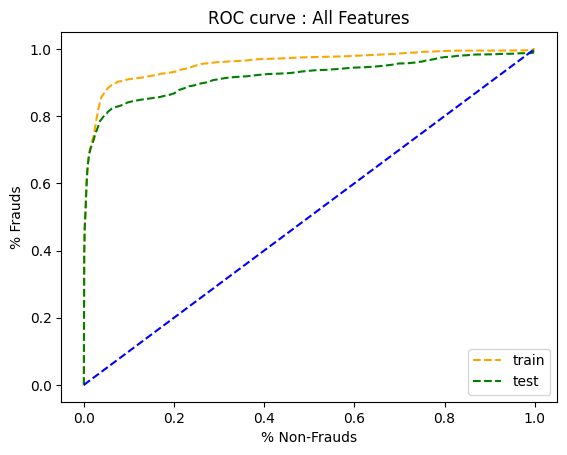

In [99]:
plotROC(y_train, score_train, y_test, score_test, model = 'All Features')

Fraud capture rate at 0.005 of Frauds in train data is : 0.5804119193689746
Fraud capture rate at 0.005 of Frauds in test data is : 0.5621224060940373


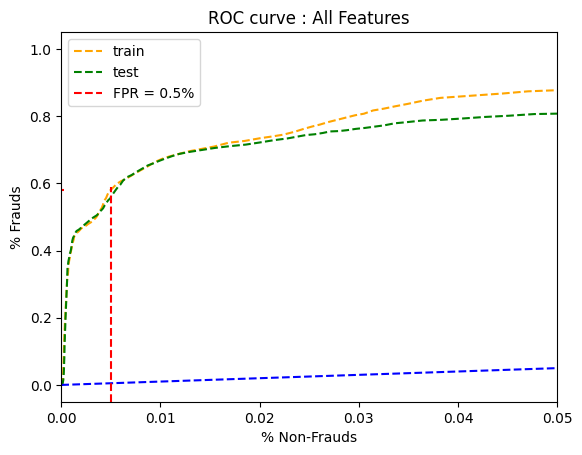

In [100]:
# target_fraud_rate can be changed
plotROC(y_train, score_train, y_test, score_test, model = 'All Features', target_fraud_rate = 0.005)

In [101]:
# import roc_auc_score
from sklearn.metrics import roc_auc_score

In [102]:
# Train data performance

auc_train = roc_auc_score(y_train, score_train)
print("AUC value of the Model on train data : ", auc_train)

lauc_train = roc_auc_score(y_train, score_train, max_fpr=0.02)
print("LAUC value of the Model on train data : ", lauc_train)

AUC value of the Model on train data :  0.9568793117168202
LAUC value of the Model on train data :  0.808470538558041


In [103]:
# Test data performance

auc_test = roc_auc_score(y_test, score_test)
print("AUC value of the Model on test data: ", auc_test)

lauc_test = roc_auc_score(y_test, score_test, max_fpr=0.02)
print("LAUC value of the Model on test data : ", lauc_test)

AUC value of the Model on test data:  0.9182210896492646
LAUC value of the Model on test data :  0.8064764642420823


#### Performance of Card Present and Card Not Present on test data

In [104]:
# Card Present
auc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0])
print("AUC value of the Model on test data for Card Present Transactions: ", auc_test_CP)

lauc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Present Transactions: ", lauc_test_CP)

# Card not Present
auc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1])
print("AUC value of the Model on test data for Card Not Present Transactions: ", auc_test_CNP)

lauc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Not Present Transactions: ", lauc_test_CNP)

AUC value of the Model on test data for Card Present Transactions:  0.9081646863002277
LAUC value of the Model on test data for Card Present Transactions:  0.7816465960447626
AUC value of the Model on test data for Card Not Present Transactions:  0.9352640107245394
LAUC value of the Model on test data for Card Not Present Transactions:  0.8449257545773218


#### Save the Logistic Regression Model

In [105]:
modelFile = os.path.join(path, model_folder, model + '.' + data + ".pkl")

dump(LR, open(modelFile, 'wb'))

#### Generate score on the whole dataset and output the scored out dataset

This dataset will be used as a input to perf_metrics notebook

In [106]:
# generate probability predictions on whole data
df['y_preds'] = pd.Series(LR.predict_proba(X_transform)[:,1])
# use the scoring function defined above to generate scores on whole dataset
df['score'] = scoring_predictions_logreg(X_transform, LR)
df.head()

Y pred min = 2.3280357592715635e-13
Y pred max = 1.0
LogOdds min = -29.0885813186593
LogOdds max = 36.04365338911715
Score min = 1
Score max = 998


transactionDateTime                pan                    merchant  \
0 2020-01-01 17:12:25  0033864050176488B  Stehr, Jewess and Schimmel   
1 2020-01-01 17:47:30  0033864050176488B            Fritsch and Sons   
2 2020-01-01 17:59:01  0033864050176488B   Tromp, Kerluke and Glover   
3 2020-01-01 18:05:38  0033864050176488B                Homenick LLC   
4 2020-01-01 18:08:36  0033864050176488B                Mayert Group   

         category  transactionAmount  mdlIsFraudTrx  mdlIsFraudAcct  is_train  \
0        misc_net          35.830000              0               0         1   
1  health_fitness           1.890000              0               0         1   
2     grocery_net          18.530000              0               0         1   
3   personal_care          90.240000              0               0         1   
4    shopping_pos         156.860000              0               0         1   

  cardholderCountry cardholderState  transactionHour  \
0                US            Iowa               17   
1                US            Iowa               17   
2                US            Iowa               17   
3                US            Iowa               18   
4                US            Iowa               18   

   time_since_last_transaction  IsHighValue  is_international  is_cnp  \
0                     0.000000            0                 0       1   
1                     0.584722            0                 0       0   
2                     0.191944            0                 0       1   
3                     0.110278            0                 0       0   
4                     0.049444            1                 0       0   

   is_shoppingnet  is_grocery_net  is_travel  IS_0_TO_5AM  average_spending  \
0               0               0      False            0         66.400815   
1               0               0      False            0         66.400815   
2               0               1      False            0         66.400815   
3               0               0      False            0         66.400815   
4               0               0      False            0         66.400815   

   wednesday_buy  monday_buy  spending_below_avg_20  spending_above_threshold  \
0       0.000000    0.000000                      1                         0   
1       0.000000    0.000000                      1                         0   
2       0.000000    0.000000                      1                         0   
3       0.000000    0.000000                      0                         1   
4       0.000000    0.000000                      0                         1   

   outside_state_purchase  is_late_night  user_avg_amount  RelativeAmount  \
0                       1              0         0.000000        0.000000   
1                       0              0        35.830000        0.052749   
2                       1              0        18.860000        0.982503   
3                       1              0        18.750000        4.812800   
4                       0              0        36.622500        4.283159   

   amt_trend_5e  amt_trend_24h  count_trend_1h  category_ratio  repeat_amt  \
0      0.000000      35.830000        1.000000        0.000000           0   
1      0.000000      18.860000        2.000000        0.000000           0   
2      0.000000      18.750000        3.000000        0.000000           0   
3      0.000000      36.622500        4.000000        0.000000           0   
4     60.670000      60.670000        5.000000        0.000000           0   

   is_CNP  y_preds  score  
0       1 0.002418    354  
1       0 0.001211    343  
2       1 0.001967    351  
3       0 0.000724    335  
4       0 0.012239    379

In [112]:
saveColumns = [*base_cols, *feature_columns, 'y_preds', 'score']
print(f"Columns to save: {saveColumns}")

Columns to save: ['pan', 'merchant', 'category', 'transactionAmount', 'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime', 'IS_0_TO_5AM', 'IsHighValue', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'is_cnp', 'is_grocery_net', 'is_international', 'is_late_night', 'is_shoppingnet', 'is_travel', 'monday_buy', 'outside_state_purchase', 'repeat_amt', 'spending_above_threshold', 'spending_below_avg_20', 'time_since_last_transaction', 'transactionHour', 'user_avg_amount', 'wednesday_buy', 'y_preds', 'score']


In [113]:
base_cols = ['pan',
 'merchant',
 'category',
 'transactionAmount',
 'mdlIsFraudTrx',
 'mdlIsFraudAcct',
 'is_train',
 'cardholderCountry',
 'cardholderState',
 'transactionDateTime']

In [114]:
saveCSV_train = os.path.join(path + data, 'score.' + model + '.' + train_dataset_name)
saveCSV_test = os.path.join(path + data, 'score.' + model + '.' + test_dataset_name)

df[df['is_train']==1][saveColumns].to_csv(saveCSV_train, index=False)
df[df['is_train']==0][saveColumns].to_csv(saveCSV_test, index=False)

### 3.2 Forward Selection of features

Forward Selection is a type of feature selection technique that starts with an empty model and adds features one by one based on a specific criterion, typically the model's performance metric. The features are added until a stop criteria is met, like maximum number of features to add or no further imporvemnet in performance.

**SequentialFeatureSelector** function from mlxtend is used to add features in Forward selection or remove features in Backward elimination (discussed in next section).

More details on SequentialFeatureSelector can be found here - https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#overview

In [116]:
from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings("ignore")

In [117]:
## initialize logistic regression model
LR_forward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [118]:
# Number of features to select can be changed
num_features_to_select_forward = 10

sfs_forward = SequentialFeatureSelector(LR_forward, k_features=num_features_to_select_forward, scoring='roc_auc',forward=True, floating=False, cv=5)
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=10,
                                                       solver='liblinear'),
                          k_features=(10, 10), scoring='roc_auc')

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

**k_feature_names_** gives list of final variables selected by SequentialFeatureSelector

In [119]:
selected_features_forward = list(sfs_forward.k_feature_names_)
print(f"Selected features: {selected_features_forward}")

Selected features: ['IS_0_TO_5AM', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'category_ratio', 'is_grocery_net', 'is_late_night', 'outside_state_purchase', 'repeat_amt', 'wednesday_buy']


**get_metric_dict** provides summary of iterations

In [120]:
# Create DataFrame to store the results
results_forward = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_forward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_forward

feature_idx  \
1                                 (3,)   
2                              (3, 16)   
3                           (0, 3, 16)   
4                        (0, 2, 3, 16)   
5                    (0, 2, 3, 11, 16)   
6                 (0, 2, 3, 4, 11, 16)   
7              (0, 2, 3, 4, 6, 11, 16)   
8          (0, 2, 3, 4, 6, 11, 15, 16)   
9       (0, 2, 3, 4, 6, 9, 11, 15, 16)   
10  (0, 2, 3, 4, 6, 9, 11, 15, 16, 22)   

                                        feature_names      roc  
1                                    (amt_trend_24h,) 0.903486  
2                         (amt_trend_24h, repeat_amt) 0.939234  
3            (IS_0_TO_5AM, amt_trend_24h, repeat_amt) 0.959965  
4   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, r... 0.960843  
5   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, i... 0.963368  
6   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, a... 0.964115  
7   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, a... 0.964115  
8   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, a... 0.963982  
9   (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, a... 0.963785  
10  (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, a... 0.963133

Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is added to the model which gives best performance.

In [121]:
# Print the selected features and the corresponding model performance
selected_features = results_forward['feature_names'].apply(lambda x: list(x))
model_performance = results_forward['roc']

list_added_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        added_feature = [x for x in features if x not in selected_features[i]][0]
        print(f"Added feature(s): {added_feature}")
    else:
        added_feature = features[0]
        print(f"Added feature(s): {added_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_added_features = list_added_features+[added_feature]

Step 1:
Added feature(s): amt_trend_24h
Model performance (roc): 0.9034862874956877
------------------------------
Step 2:
Added feature(s): repeat_amt
Model performance (roc): 0.9392344413833044
------------------------------
Step 3:
Added feature(s): IS_0_TO_5AM
Model performance (roc): 0.9599654638691668
------------------------------
Step 4:
Added feature(s): RelativeAmount
Model performance (roc): 0.9608429402572529
------------------------------
Step 5:
Added feature(s): is_late_night
Model performance (roc): 0.9633679384920415
------------------------------
Step 6:
Added feature(s): amt_trend_5e
Model performance (roc): 0.9641149761079669
------------------------------
Step 7:
Added feature(s): category_ratio
Model performance (roc): 0.9641149761079669
------------------------------
Step 8:
Added feature(s): outside_state_purchase
Model performance (roc): 0.9639824985377828
------------------------------
Step 9:
Added feature(s): is_grocery_net
Model performance (roc): 0.9637845

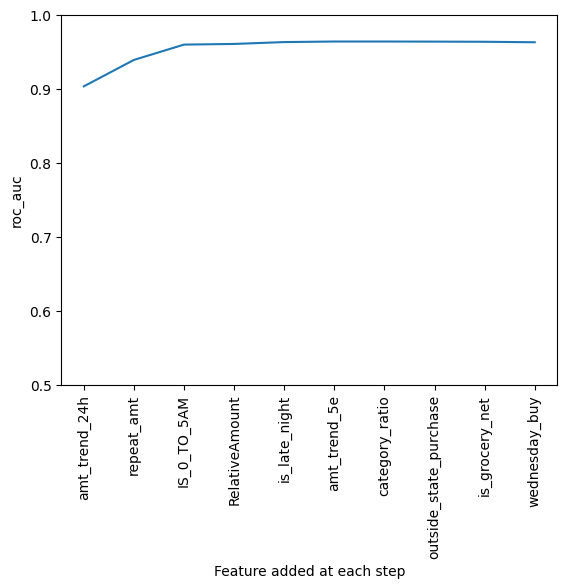

In [122]:
plt.plot(list_added_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature added at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As variables are added to the model at each step, the performance of the model increases initially. The rate of performance improvement decreases with each iteration. After a certain point, no further significant improvement is observed.

#### Train a Log Reg model with selected features and evaluate the performance

In [123]:
# Creating train and test feature datasets with only the selected features from forward selection method
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]
print(X_train_forward.shape)
print(X_test_forward.shape)

(445598, 10)
(264502, 10)


In [124]:
# Train the model using selected features
LR_forward.fit(X_train_forward, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [125]:
# Feature Importance
# Fetching coefficients
feature_coefficients_forward = LR_forward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_forward = X_train_forward.columns
df_importance_forward = pd.DataFrame({
    'Feature_forward': feature_names_forward,
    'Coefficients_forward': feature_coefficients_forward
}).sort_values(by='Coefficients_forward', ascending=False)

display(df_importance_forward)

Feature_forward  Coefficients_forward
6           is_late_night              0.815635
0             IS_0_TO_5AM              0.623305
1          RelativeAmount              0.347141
8              repeat_amt              0.185940
3            amt_trend_5e              0.130242
2           amt_trend_24h              0.115703
9           wednesday_buy              0.041953
7  outside_state_purchase              0.025037
4          category_ratio              0.000000
5          is_grocery_net             -0.060988

In [126]:
# Generate scores and evaluate performance on train dataset
score_train_forward = scoring_predictions_logreg(X_train_forward, LR_forward)
auc_train_forward = roc_auc_score(y_train, score_train_forward)
print("AUC value of Forward Inclusion Model on train data: ", auc_train_forward)

Y pred min = 0.0014038384684039048
Y pred max = 1.0
LogOdds min = -6.5671402062189514
LogOdds max = 36.04365338911715
Score min = 1
Score max = 999
AUC value of Forward Inclusion Model on train data:  0.96380465610222


In [127]:
# Generate scores and evaluate performance on test dataset
score_test_forward = scoring_predictions_logreg(X_test_forward, LR_forward)
auc_test_forward = roc_auc_score(y_test, score_test_forward)
print("AUC value of Forward Inclusion Model on test data: ", auc_test_forward)

Y pred min = 0.0014037249473957706
Y pred max = 1.0
LogOdds min = -6.567221187891736
LogOdds max = 30.780963200212227
Score min = 1
Score max = 999
AUC value of Forward Inclusion Model on test data:  0.9569728032913253


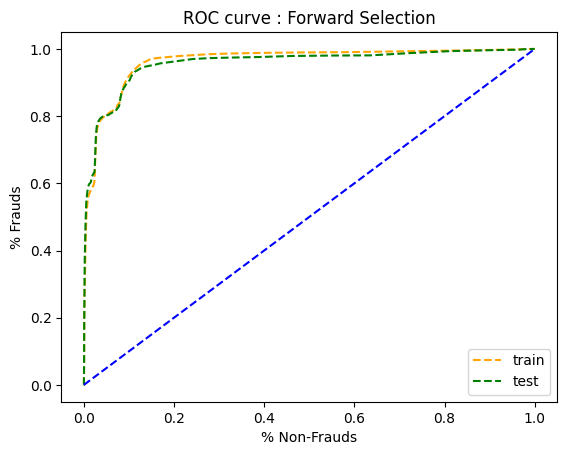

In [128]:
plotROC(y_train, score_train_forward, y_test, score_test_forward, model = 'Forward Selection')

In [129]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_forward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_forward.values[df_test['is_CNP']==0])
print("AUC value of the Forward Inclusion Model on test data for Card Present Transactions: ", auc_test_CP_forward)

# Card not Present
auc_test_CNP_forward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_forward.values[df_test['is_CNP']==1])
print("AUC value of the Forward Inclusion Model on test data for Card Not Present Transactions: ", auc_test_CNP_forward)

AUC value of the Forward Inclusion Model on test data for Card Present Transactions:  0.9481917767644309
AUC value of the Forward Inclusion Model on test data for Card Not Present Transactions:  0.9743377015893977


### 3.3 Backward Elimination of features

Backward Elimination is a feature selection method that starts with a model with all the variables and removes the least significant features one by one until a stopping criteria is met.

In [130]:
## initialize logistic regression model
LR_backward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [131]:
# Number of features to select can be changed
num_features_to_select_backward = 10

sfs_backward = SequentialFeatureSelector(LR_backward, k_features=num_features_to_select_backward, scoring='roc_auc',forward=False, floating=False, cv=5)
sfs_backward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=10,
                                                       solver='liblinear'),
                          forward=False, k_features=(10, 10),
                          scoring='roc_auc')

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

In [132]:
selected_features_backward = list(sfs_backward.k_feature_names_)
print(f"Selected features: {selected_features_backward}")

Selected features: ['IS_0_TO_5AM', 'RelativeAmount', 'amt_trend_24h', 'category_ratio', 'count_trend_1h', 'is_late_night', 'repeat_amt', 'spending_above_threshold', 'spending_below_avg_20', 'time_since_last_transaction']


In [133]:
# Create DataFrame to store the results
results_backward = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_backward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_backward

feature_idx  \
23  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
21  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...   
19  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16,...   
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16,...   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16,...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 16, 17...   
15  (0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 16, 17, 1...   
14   (0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 16, 17, 18, 19)   
13      (0, 1, 2, 3, 5, 6, 7, 11, 12, 16, 17, 18, 19)   
12          (0, 1, 2, 3, 5, 6, 7, 11, 16, 17, 18, 19)   
11             (0, 1, 2, 3, 6, 7, 11, 16, 17, 18, 19)   
10                (0, 2, 3, 6, 7, 11, 16, 17, 18, 19)   

                                        feature_names      roc  
23  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.953509  
22  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.954206  
21  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.954555  
20  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.954770  
19  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.954886  
18  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.954975  
17  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955051  
16  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955200  
15  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955366  
14  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955497  
13  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955544  
12  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.955813  
11  (IS_0_TO_5AM, IsHighValue, RelativeAmount, amt... 0.957317  
10  (IS_0_TO_5AM, RelativeAmount, amt_trend_24h, c... 0.958234

Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is removed from the model which least affects the performance.

In [134]:
# Print the selected features and the corresponding model performance
selected_features = results_backward['feature_names'].apply(lambda x: list(x))
model_performance = results_backward['roc']

list_removed_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        removed_feature = [x for x in selected_features[X_train.shape[1]+1-i] if x not in features][0]
        print(f"Removed feature(s): {removed_feature}")
    else:
        removed_feature = 'NA'
        print(f"Removed feature(s): {removed_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_removed_features = list_removed_features+[removed_feature]

Step 1:
Removed feature(s): NA
Model performance (roc): 0.953509404496827
------------------------------
Step 2:
Removed feature(s): user_avg_amount
Model performance (roc): 0.9542057928969596
------------------------------
Step 3:
Removed feature(s): is_travel
Model performance (roc): 0.9545554579284182
------------------------------
Step 4:
Removed feature(s): is_international
Model performance (roc): 0.9547696753897735
------------------------------
Step 5:
Removed feature(s): outside_state_purchase
Model performance (roc): 0.9548856702926873
------------------------------
Step 6:
Removed feature(s): wednesday_buy
Model performance (roc): 0.9549752758574283
------------------------------
Step 7:
Removed feature(s): transactionHour
Model performance (roc): 0.9550513454008833
------------------------------
Step 8:
Removed feature(s): is_cnp
Model performance (roc): 0.9552004881165738
------------------------------
Step 9:
Removed feature(s): is_grocery_net
Model performance (roc): 0.9

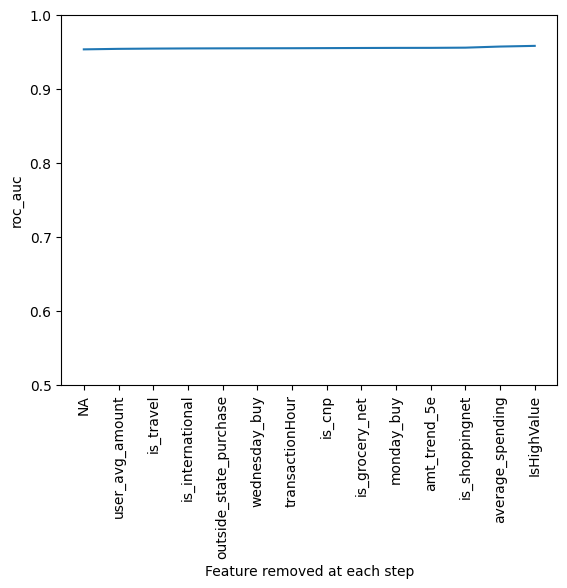

In [135]:
plt.plot(list_removed_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature removed at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As the features are removed at each step, the performance remains almost same initially. As more features are removed, roc starts to decrease slightly. If more features are removed, we can observe that the performance decresases at each step.

#### Train a Log Reg model with selected features and evaluate on test dataset

In [136]:
# Creating train and test feature datasets with only the selected features from backward elimination method
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]
print(X_train_backward.shape)
print(X_test_backward.shape)

(445598, 10)
(264502, 10)


In [137]:
# train the model using selected features
LR_backward.fit(X_train_backward, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [138]:
# Feature Importance
# Fetching coefficients
feature_coefficients_backward = LR_backward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_backward = X_train_backward.columns
df_importance_backward = pd.DataFrame({
    'Feature_backward': feature_names_backward,
    'Coefficients_backward': feature_coefficients_backward
}).sort_values(by='Coefficients_backward', ascending=False)

display(df_importance_backward)

Feature_backward  Coefficients_backward
7     spending_above_threshold               1.438768
8        spending_below_avg_20               0.890663
5                is_late_night               0.802923
0                  IS_0_TO_5AM               0.623650
1               RelativeAmount               0.218230
6                   repeat_amt               0.199924
2                amt_trend_24h               0.180790
3               category_ratio               0.000000
4               count_trend_1h              -0.026683
9  time_since_last_transaction              -0.347880

In [139]:
# Make predictions and evaluate performance on test dataset
score_train_backward = scoring_predictions_logreg(X_train_backward, LR_backward)
auc_train_backward = roc_auc_score(y_train, score_train_backward)
print("AUC value of Backward Elimination Model on train data: ", auc_train_backward)

Y pred min = 9.903476311964252e-07
Y pred max = 1.0
LogOdds min = -13.825208822483145
LogOdds max = 28.900825987955255
Score min = 1
Score max = 999
AUC value of Backward Elimination Model on train data:  0.9589309214454312


In [140]:
# Make predictions and evaluate performance on test dataset
score_test_backward = scoring_predictions_logreg(X_test_backward, LR_backward)
auc_test_backward = roc_auc_score(y_test, score_test_backward)
print("AUC value of Backward Elimination Model on test data: ", auc_test_backward)

Y pred min = 2.8889430110765156e-07
Y pred max = 1.0
LogOdds min = -15.057204666950796
LogOdds max = 20.63548491766705
Score min = 1
Score max = 999
AUC value of Backward Elimination Model on test data:  0.9512394489255305


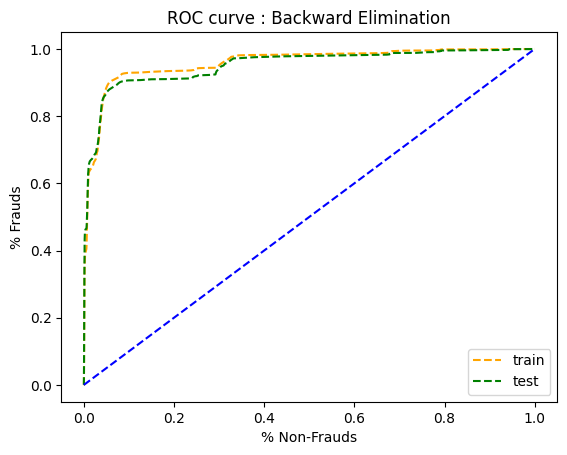

In [141]:
plotROC(y_train, score_train_backward, y_test, score_test_backward, model = 'Backward Elimination')

In [142]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_backward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_backward.values[df_test['is_CNP']==0])
print("AUC value of the Backward Elimination Model on test data for Card Present Transactions: ", auc_test_CP_backward)

# Card not Present
auc_test_CNP_backward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_backward.values[df_test['is_CNP']==1])
print("AUC value of the Backward Elimination Model on test data for Card Not Present Transactions: ", auc_test_CNP_backward)

AUC value of the Backward Elimination Model on test data for Card Present Transactions:  0.9375050304429321
AUC value of the Backward Elimination Model on test data for Card Not Present Transactions:  0.9776358138765383


### Exercise

- Train log reg model on new features (at least 10 variables)
- Identify important features
- Calculate AUC values for train, test, CP and CNP
- Prepare Midpoint Report